# EDA

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from scipy import fftpack, signal, stats

In [8]:
raw_data = "../raw/train.csv"
sub_data = "../raw/sample_submission.csv"
test_data = "../raw/test/{}.csv" 
proc_data = "../processed/{}"

In [25]:
df = pd.read_csv(sub_data, header=0).set_index("seg_id")
df["time_to_failure"] = 10
df.to_csv("qqq.csv")

In [10]:
0.146 + 0.134 + 0.146 + 0.134 + 0.131 + 0.029 + 0.111 + 0.029 + 0.112 + 0.021

0.9930000000000001

In [11]:
(1 - 0.831) / 9

0.018777777777777782

In [5]:
5.982 - 5.017  + 1 - 2 * 0.972

0.020999999999999908

In [26]:
df = pd.read_csv(raw_data, header=0, nrows=5656574)
df.columns = ["x", "y"]

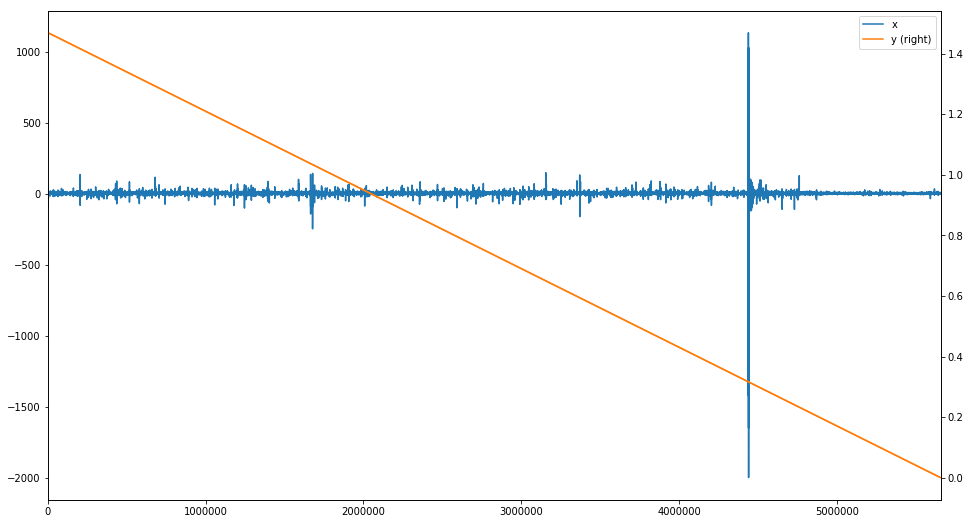

In [27]:
df.loc[::100,:].plot(figsize=(16,9), secondary_y=["y"])

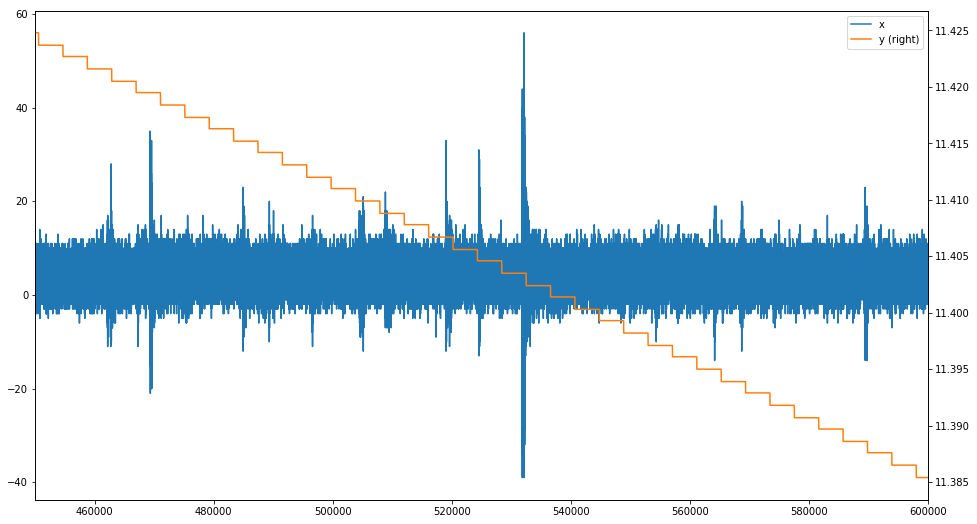

In [90]:
block = 150000
num = 3
df.iloc[num * block: (num + 1) * block].plot(figsize=(16,9), secondary_y=["y"])

In [91]:
df_x = df.iloc[num * block: (num + 1) * block].x
rez = np.apply_along_axis(lambda x: stats.entropy(pd.Series(x).value_counts(normalize=True)), 1, df_x.values.reshape((-1, 375)))
np.std(rez)

0.19818220227051633

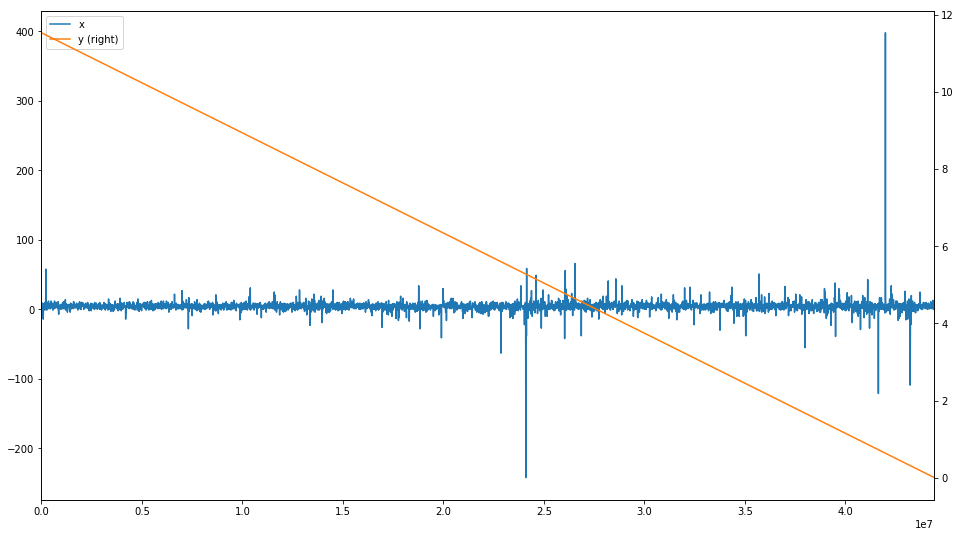

In [87]:
df = pd.read_csv(raw_data, skiprows=5656574, nrows=44429303)
df.columns = ["x", "y"]
df.loc[::10000,:].plot(figsize=(16,9), secondary_y=["y"])

In [38]:
summary = []
for name in tqdm_notebook(pd.read_csv(sub_data).seg_id):
    summary.append(pd.read_csv(test_data.format(name)).describe())

In [69]:
def yield_train_blocks(chunksize=150000):
    yield from pd.read_csv(
        raw_data, 
        names=["x", "y"], 
        dtype={"x": "int32", "y": "float32"}, 
        skiprows=1, 
        chunksize=chunksize
    )

In [70]:
def yield_sub_series():
    min_y = None
    blocks = []
    for block in yield_train_blocks():
        blocks.append(block)
        block_min_time = block.y.min()
        if min_y is None or block_min_time < min_y:
            min_y = block_min_time
            continue
        df = pd.concat(blocks, ignore_index=True)
        end_of_series = df.y.idxmin()
        blocks = [df.loc[end_of_series+1:]]
        min_y = blocks[0].y.min()
        yield df.loc[:end_of_series]
    yield pd.concat(blocks, ignore_index=True)

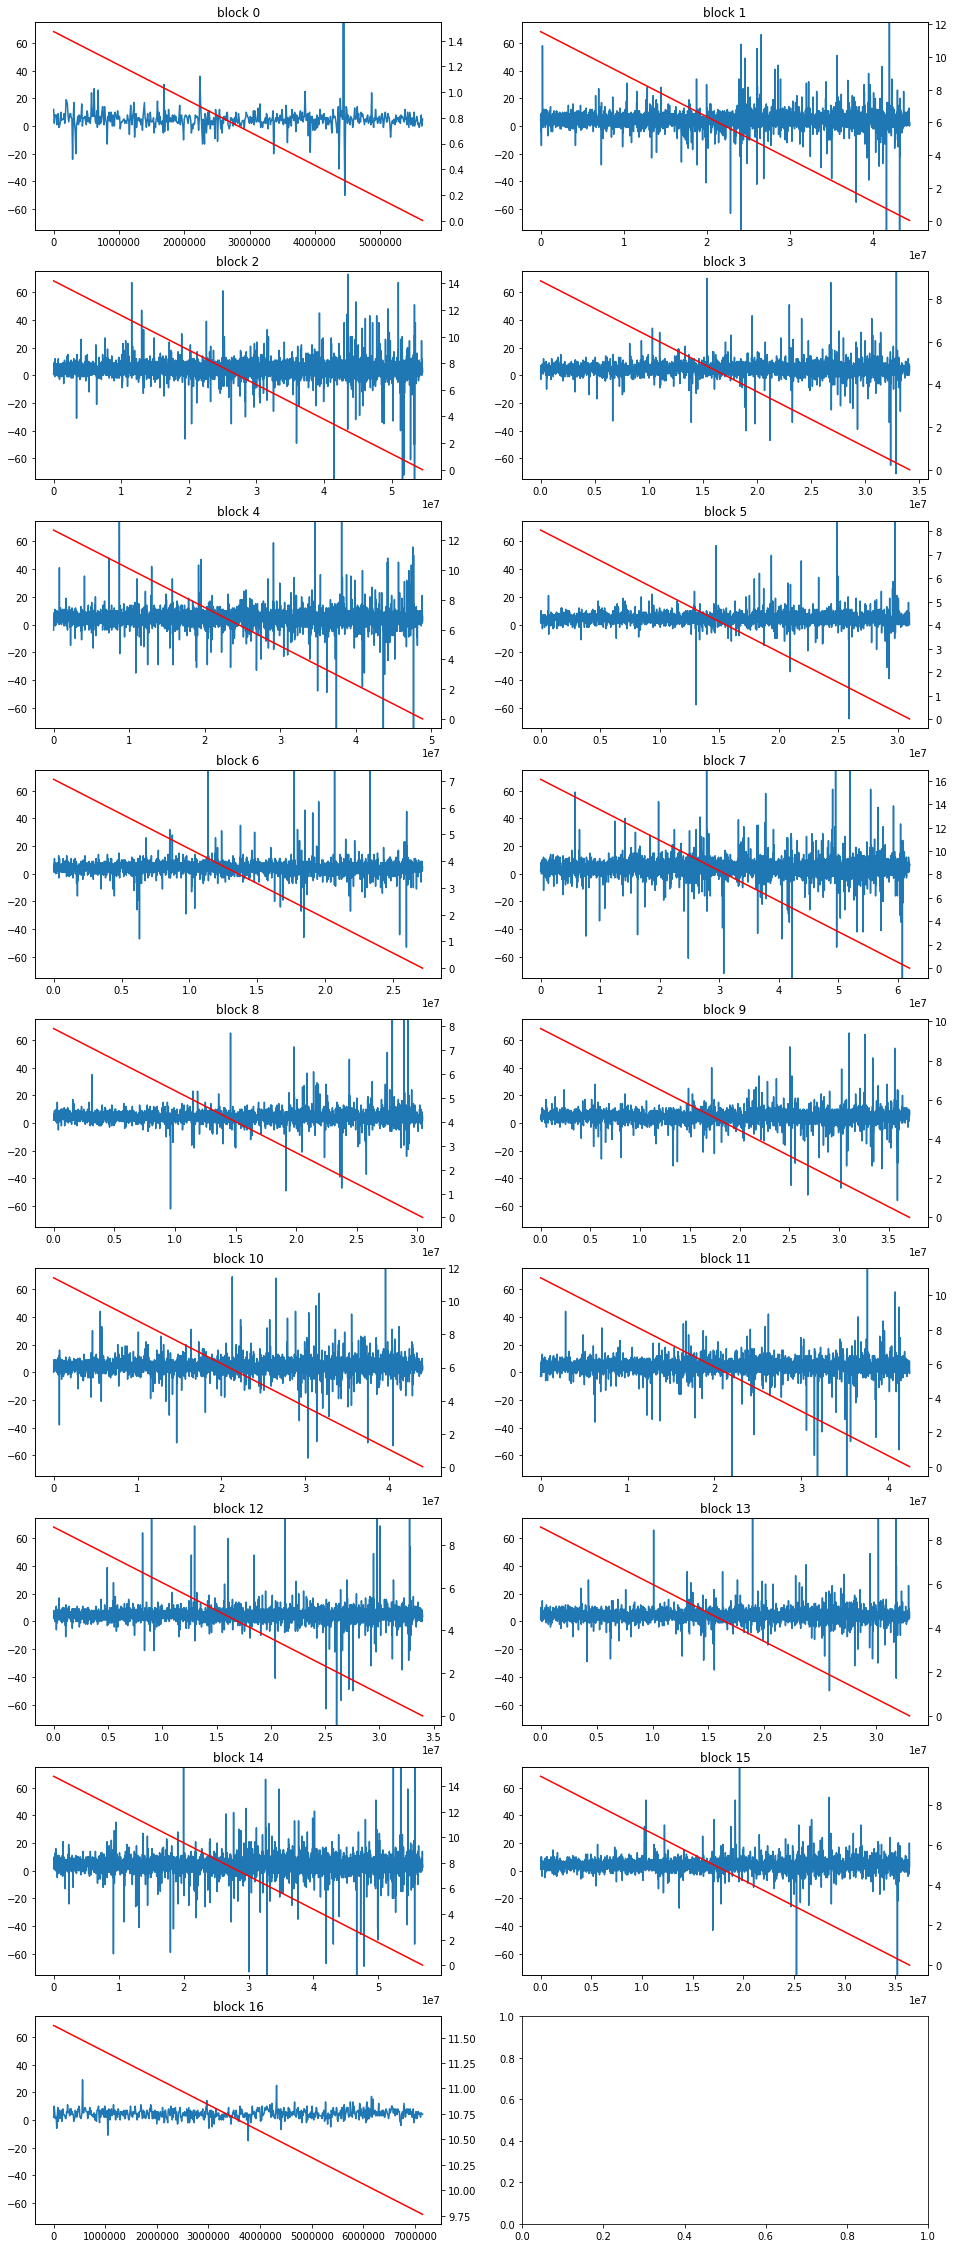

In [72]:
_, axs = plt.subplots(9, 2, figsize=(16, 9 * 9 / 2))
axs = axs.flatten()
for i, df in tqdm_notebook(enumerate(yield_sub_series())):
    axs[i].set_title(f"block {i}") 
    ax2 = axs[i].twinx()
    axs[i].set_ylim(-75, 75)
    step = len(df) // 5000
    axs[i].plot(df.x.loc[::step])   
    ax2.plot(df.y.loc[::step], color='r')   

# Анализ признаков

In [13]:
def yield_train_blocks(chunk_size=150000):
    dfs_gen = pd.read_csv(
        raw_data,
        names=["x", "y"],
        dtype={"x": "int32", "y": "float32"},
        skiprows=1,
        chunksize=chunk_size
    )
    for df in dfs_gen:
        time = df.y
        first_time = time.iloc[0]
        last_time = time.iloc[-1]
        if first_time < last_time:
            continue
        if len(df) == chunk_size:
            df.reset_index(drop=True, inplace=True)
            yield df.x, last_time

In [21]:
data = []
for df_x, y in tqdm_notebook(yield_train_blocks()):
    np.apply_along_axis(lambda x: stats.entropy(pd.Series(x).value_counts(normalize=True)), axis=1 df_x.values.reshape((-1, 375)))
    data.append([stats.entropy(df_x.value_counts(normalize=True)), y])

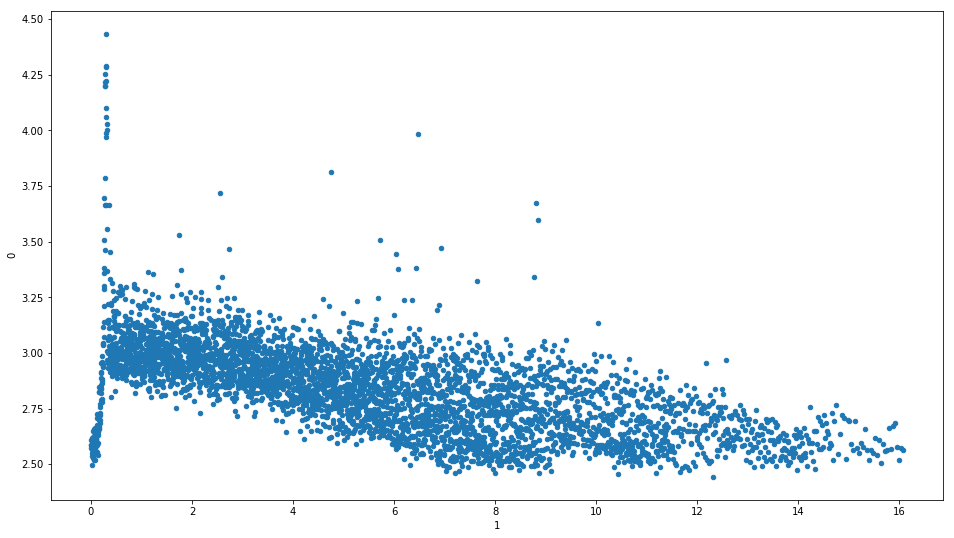

In [23]:
pd.DataFrame(data).plot.scatter(1, 0, figsize=(16,9))

# Анализ OOF предсказания

In [12]:
df = pd.read_pickle(proc_data.format("oof.pickle"))

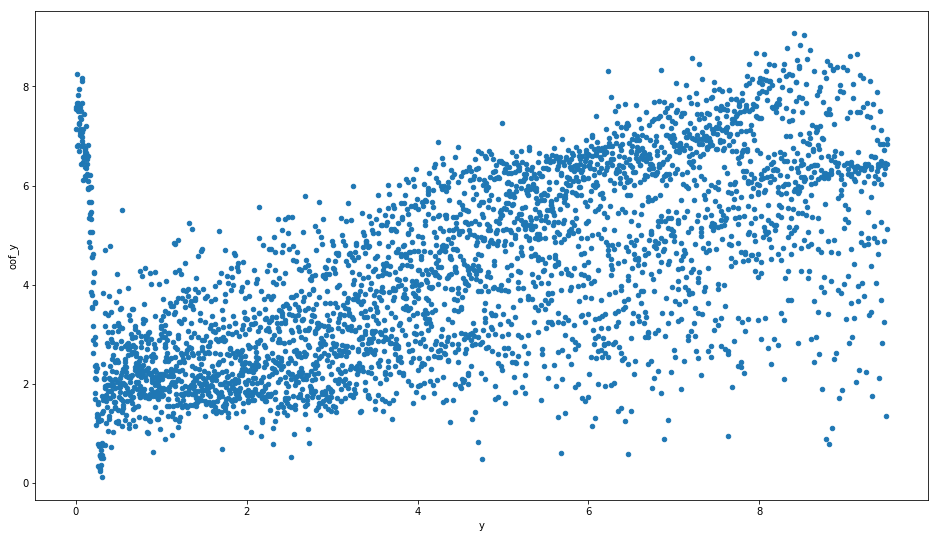

In [15]:
df.plot.scatter("y", "oof_y", figsize=(16,9))

In [23]:
df.oof_y.min()

0.0006368007867805225

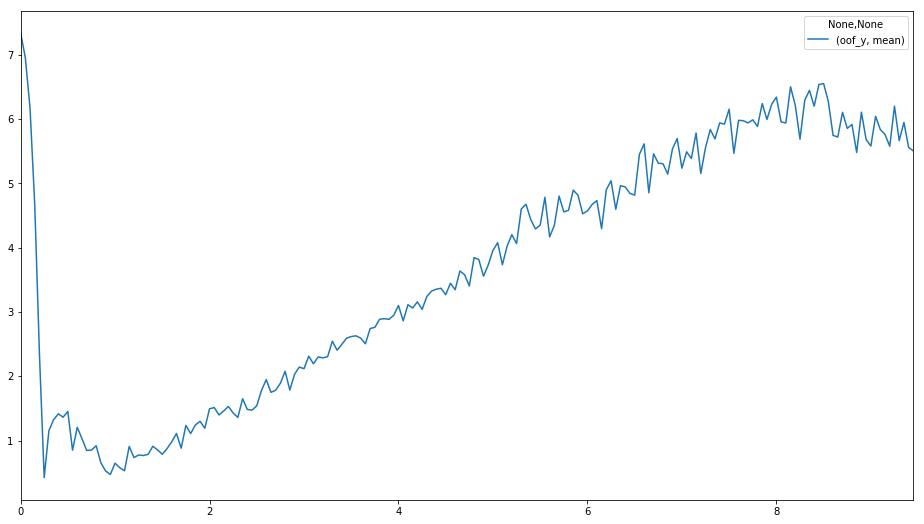

In [26]:
rez.plot(figsize=(16,9))

# Важность признаков

In [ ]:
pd.read_pickle(proc_data.format("importance.pickle"))